In [ ]:
!pip install torch-geometric

In [36]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
!pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 32.7 MB/s eta 0:00:00


In [23]:
from torch_geometric.utils import remove_self_loops

# Create a dummy graph dataset with self-loops
edge_index = torch.tensor([[0, 1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7, 8, 8, 9, 9],
                           [1, 0, 2, 1, 3, 2, 5, 6, 4, 7, 5, 8, 9, 7, 10, 9, 11]], dtype=torch.long)

# Remove self-loops from the adjacency matrix
edge_index, _ = remove_self_loops(edge_index)


In [24]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, TransformerConv
from torch_geometric.utils import add_self_loops, degree

from torch_geometric.utils import remove_self_loops

# Create a dummy graph dataset with self-loops
edge_index = torch.tensor([[0, 1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7, 8, 8, 9, 9],
                           [1, 0, 2, 1, 3, 2, 5, 6, 4, 7, 5, 8, 9, 7, 10, 9, 11]], dtype=torch.long)

# Remove self-loops from the adjacency matrix
edge_index, _ = remove_self_loops(edge_index)

# Compute the degree of each node
deg = degree(edge_index[0], x.size(0), dtype=torch.float)

# Define the GNN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(16, 128)
        self.conv2 = GCNConv(128, 2)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Define the graph transformer model
class GraphTransformer(torch.nn.Module):
    def __init__(self):
        super(GraphTransformer, self).__init__()
        self.conv1 = TransformerConv(16, 32, heads=4)
        self.conv2 = TransformerConv(128, 2, heads=4)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create instances of the GNN and graph transformer models
gnn_model = GCN()
graph_transformer_model = GraphTransformer()

# Compute the output of the GNN model
gnn_output = gnn_model(x, edge_index)
print("GNN output:", gnn_output)

# Compute the output of the graph transformer model
graph_transformer_output = graph_transformer_model(x, edge_index)
print("Graph transformer output:", graph_transformer_output)


GNN output: tensor([[-1.0273, -0.4431],
        [-1.0101, -0.4528],
        [-0.7061, -0.6803],
        [-0.7624, -0.6283],
        [-0.8497, -0.5578],
        [-0.6679, -0.7190],
        [-0.5962, -0.8005],
        [-0.3756, -1.1613],
        [-0.2382, -1.5513],
        [-0.6952, -0.6911],
        [-0.1858, -1.7746],
        [-1.0070, -0.4546]], grad_fn=<LogSoftmaxBackward0>)
Graph transformer output: tensor([[-1.6752, -3.6277, -2.9182, -1.2780, -2.9839, -2.4672, -1.8288, -1.8483],
        [-1.7082, -2.1716, -2.4659, -1.3640, -3.2067, -1.7921, -2.4197, -2.6856],
        [-2.0270, -3.8384, -2.8283, -0.9567, -2.8480, -2.1371, -2.2590, -2.0952],
        [-2.0138, -3.4741, -2.6788, -0.8124, -2.6193, -1.9213, -2.8298, -3.1050],
        [-2.4212, -3.2903, -2.0802, -1.3680, -2.4677, -3.0894, -1.2513, -2.5512],
        [-2.7719, -2.9845, -2.6044, -1.8397, -1.8456, -2.3176, -1.2255, -2.2631],
        [-2.8915, -2.2796, -1.6771, -1.3613, -2.0482, -4.2536, -1.5960, -2.9367],
        [-2.7313, -2

In [25]:
import pandas as pd

# Convert the GNN output to a pandas DataFrame
gnn_df = pd.DataFrame(gnn_output.detach().numpy(), columns=['Class 0', 'Class 1'])
gnn_df.index.name = 'Node ID'

# Convert the graph transformer output to a pandas DataFrame
graph_transformer_df = pd.DataFrame(graph_transformer_output.detach().numpy())
graph_transformer_df.columns = [f'Head {i}' for i in range(graph_transformer_output.shape[1])]
graph_transformer_df.index.name = 'Node ID'

# Print the DataFrames to the console
print("GNN output:")
print(gnn_df)
print("Graph transformer output:")
print(graph_transformer_df)

GNN output:
          Class 0   Class 1
Node ID                    
0       -1.027320 -0.443113
1       -1.010141 -0.452820
2       -0.706118 -0.680342
3       -0.762436 -0.628349
4       -0.849719 -0.557804
5       -0.667939 -0.719007
6       -0.596246 -0.800455
7       -0.375553 -1.161263
8       -0.238211 -1.551340
9       -0.695235 -0.691064
10      -0.185789 -1.774600
11      -1.007023 -0.454611
Graph transformer output:
           Head 0    Head 1    Head 2    Head 3    Head 4    Head 5    Head 6  \
Node ID                                                                         
0       -1.675206 -3.627676 -2.918150 -1.278034 -2.983888 -2.467238 -1.828762   
1       -1.708170 -2.171605 -2.465936 -1.363984 -3.206658 -1.792077 -2.419668   
2       -2.027018 -3.838355 -2.828316 -0.956678 -2.847983 -2.137058 -2.258991   
3       -2.013847 -3.474106 -2.678825 -0.812450 -2.619276 -1.921295 -2.829753   
4       -2.421209 -3.290278 -2.080172 -1.368021 -2.467713 -3.089360 -1.251327   
5  

In [26]:
gnn_df

,Class 0,Class 1
Node ID,,
0,-1.027320,-0.443113
1,-1.010141,-0.452820
2,-0.706118,-0.680342
3,-0.762436,-0.628349
4,-0.849719,-0.557804
5,-0.667939,-0.719007
6,-0.596246,-0.800455
7,-0.375553,-1.161263
8,-0.238211,-1.551340


In [27]:
graph_transformer_df

,Head 0,Head 1,Head 2,Head 3,Head 4,Head 5,Head 6,Head 7
Node ID,,,,,,,,
0,-1.675206,-3.627676,-2.918150,-1.278034,-2.983888,-2.467238,-1.828762,-1.848281
1,-1.708170,-2.171605,-2.465936,-1.363984,-3.206658,-1.792077,-2.419668,-2.685569
2,-2.027018,-3.838355,-2.828316,-0.956678,-2.847983,-2.137058,-2.258991,-2.095202
3,-2.013847,-3.474106,-2.678825,-0.812450,-2.619276,-1.921295,-2.829753,-3.105042
4,-2.421209,-3.290278,-2.080172,-1.368021,-2.467713,-3.089360,-1.251327,-2.551190
5,-2.771869,-2.984490,-2.604372,-1.839713,-1.845597,-2.317576,-1.225524,-2.263075
6,-2.891518,-2.279600,-1.677060,-1.361290,-2.048169,-4.253595,-1.595999,-2.936697
7,-2.731340,-2.020023,-3.392587,-0.811140,-2.884751,-2.576765,-2.202900,-2.502592
8,-3.919663,-3.683625,-3.569483,-0.706754,-1.700332,-1.991199,-2.327241,-4.081125


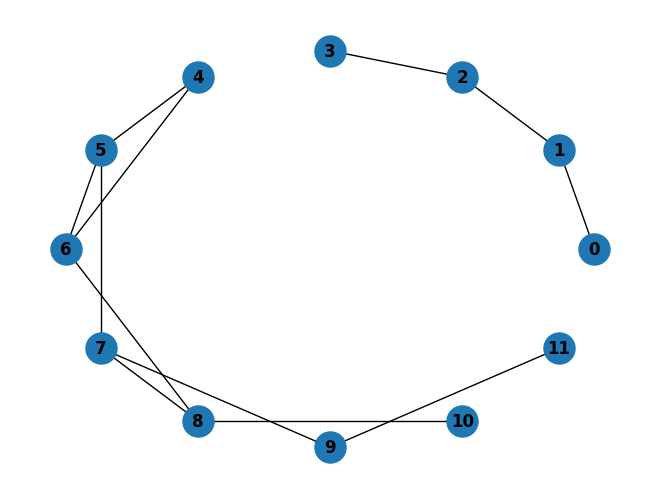

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a NetworkX graph from the edge_index tensor
G = nx.Graph()
edge_list = edge_index.T.tolist()
G.add_edges_from(edge_list)

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=12, font_weight='bold')
plt.show()

In [29]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Set display option to show all columns
# Create a pandas dataframe for edge_index tensor
edge_df = pd.DataFrame(edge_index.t().numpy(), columns=['source', 'target'])

# Create a pandas dataframe for node features tensor
node_df = pd.DataFrame(x.numpy())

# Concatenate the dataframes
df = pd.concat([edge_df, node_df], axis=1)

# Print the dataframe
df


,source,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1,-0.638791,-0.016198,0.382978,0.773586,0.875738,0.779754,-1.098636,0.114901,0.904830,-0.103804,-0.259409,1.144863,-1.214950,-1.300621,0.452405,1.097295
1,1,0,-0.113198,0.928356,0.181381,-1.902018,-1.670903,-0.423227,0.231213,3.471400,1.491527,-0.082813,-1.671565,0.798440,0.396212,-1.604178,1.588681,-0.382014
2,1,2,0.627654,-0.064612,-0.152552,0.634080,1.199558,-0.810069,0.566286,1.033274,0.401978,-1.063499,0.518244,-0.033499,-0.494690,0.175913,1.272766,0.471567
3,2,1,0.389574,0.051602,0.110220,-0.440473,-0.667105,1.675841,-0.027962,0.188639,-0.622673,-1.180568,-0.193443,1.820568,-0.003758,0.520595,-0.069073,-1.315151
4,2,3,0.209143,-0.227960,-0.341602,-1.109184,1.000566,0.886408,1.147849,-1.043132,-0.760576,1.157446,1.426470,-1.372235,-0.774260,-0.792549,1.642200,0.306375
5,3,2,0.492729,1.364804,-0.190294,-0.182702,0.479783,0.679096,0.817932,-1.100540,0.642955,-0.660275,-0.440110,2.269031,0.697263,0.977777,1.269154,-0.789602
6,4,5,-0.218593,-1.234408,-0.117437,-1.450145,0.220345,-1.187122,-0.167697,-0.997240,-1.048262,0.007862,2.670382,0.632532,0.387837,-0.258275,0.799380,-0.149972
7,4,6,1.342335,-0.283837,-0.127341,-0.623906,-0.997805,-0.999587,-0.556650,-0.525402,1.433664,-0.122018,0.556235,-1.102534,0.149798,-0.487103,0.007759,-0.518467
8,5,4,-1.926783,0.758570,1.445845,0.453529,0.403078,0.447662,-0.605635,-0.803212,-0.543065,0.968904,-0.510095,-0.754189,-0.027453,-0.548748,0.023858,3.189461
9,5,7,-0.578032,-0.673320,0.457702,1.669078,0.613149,0.621390,-0.870667,1.726051,-0.337866,0.775521,0.960713,-0.928591,-0.382724,1.312326,0.013076,-0.070076


In [32]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Generate a random graph with 80 nodes
G = nx.fast_gnp_random_graph(80, 0.1)

# Assign a label to each node indicating whether it is infected (1) or not (0)
labels = np.zeros(80)
labels[0] = 1  # patient 0 is initially infected

# Simulate the spread of the infection using the SIR model
beta = 0.2  # infection rate
gamma = 0.1  # recovery rate

for t in range(30):  # simulate for 30 time steps
    # Compute the probability of infection for each susceptible node
    infected_nodes = [i for i in range(80) if labels[i] == 1]
    susceptible_nodes = [i for i in range(80) if labels[i] == 0]
    for i in susceptible_nodes:
        neighbors = list(G.neighbors(i))
        num_infected_neighbors = sum([labels[j] for j in neighbors])
        p_infection = 1 - (1 - beta) ** num_infected_neighbors
        if np.random.rand() < p_infection:
            labels[i] = 1
    
    # Compute the probability of recovery for each infected node
    for i in infected_nodes:
        if np.random.rand() < gamma:
            labels[i] = 2
            
# Create an adjacency matrix from the graph
adj_matrix = nx.to_numpy_array(G)

# Print the adjacency matrix and the labels to the console
print("Adjacency matrix:")
print(adj_matrix)
print("Labels:")
print(labels)

Adjacency matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Labels:
[2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2.]


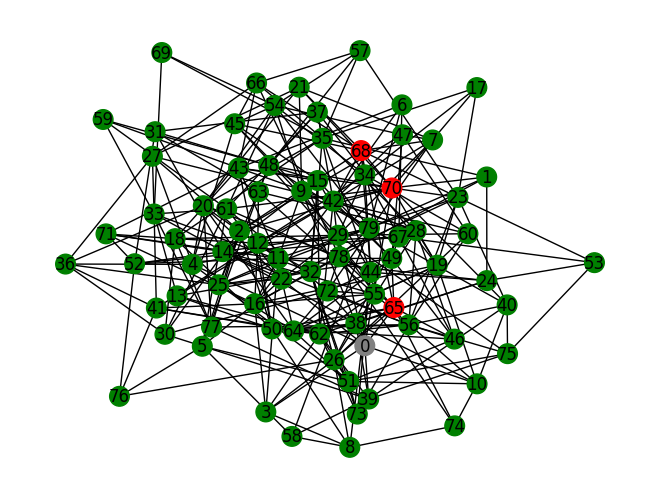

In [39]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate a random graph with 80 nodes
G = nx.fast_gnp_random_graph(80, 0.1)

# Assign a label to each node indicating whether it is infected (1) or not (0)
labels = np.zeros(80)
labels[0] = 1  # patient 0 is initially infected

# Simulate the spread of the infection using the SIR model
beta = 0.2  # infection rate
gamma = 0.1  # recovery rate

# Define a function to update the plot at each time step
def update_plot(t):
    # Compute the probability of infection for each susceptible node
    infected_nodes = [i for i in range(80) if labels[i] == 1]
    susceptible_nodes = [i for i in range(80) if labels[i] == 0]
    for i in susceptible_nodes:
        neighbors = list(G.neighbors(i))
        num_infected_neighbors = sum([labels[j] for j in neighbors])
        p_infection = 1 - (1 - beta) ** num_infected_neighbors
        if np.random.rand() < p_infection:
            labels[i] = 1
    
    # Compute the probability of recovery for each infected node
    for i in infected_nodes:
        if np.random.rand() < gamma:
            labels[i] = 2
            
    # Draw the graph with node colors corresponding to the labels
    colors = ['green' if label == 0 else 'red' if label == 1 else 'gray' for label in labels]
    nx.draw(G, pos=nx.spring_layout(G), node_color=colors, with_labels=True, node_size=200)

# Create an animation of the infection spreading through the network
anim = FuncAnimation(plt.gcf(), update_plot, frames=30, interval=500, repeat=True)



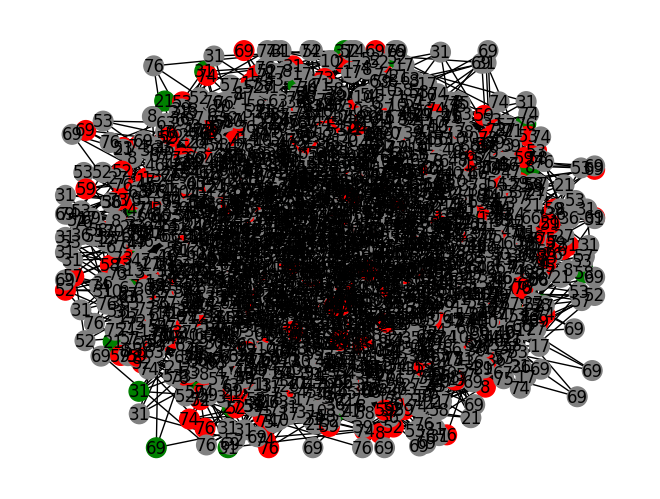

In [40]:
# Save the animation as a gif
anim.save('infection.gif', writer='imagemagick')

# Show the final plot
plt.show()

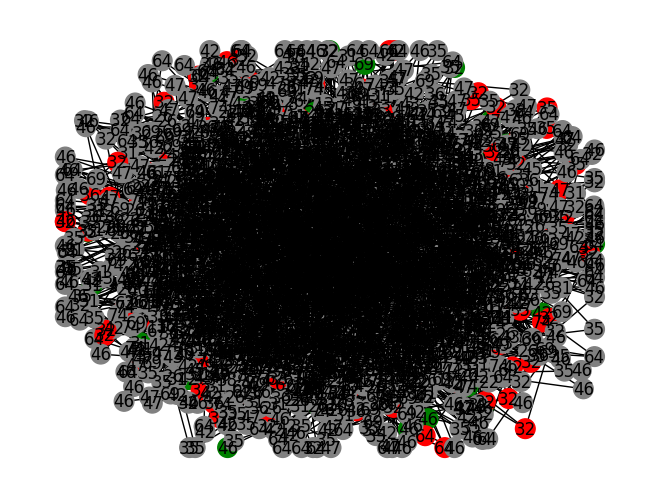

In [41]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Generate a random graph with 80 nodes
G = nx.fast_gnp_random_graph(80, 0.1)

# Assign a label to each node indicating whether it is infected (1) or not (0)
labels = np.zeros(80)
labels[0] = 1  # patient 0 is initially infected

# Simulate the spread of the infection using the SIR model
beta = 0.2  # infection rate
gamma = 0.1  # recovery rate

# Define a function to update the plot at each time step
def update_plot(t):
    # Compute the probability of infection for each susceptible node
    infected_nodes = [i for i in range(80) if labels[i] == 1]
    susceptible_nodes = [i for i in range(80) if labels[i] == 0]
    for i in susceptible_nodes:
        neighbors = list(G.neighbors(i))
        num_infected_neighbors = sum([labels[j] for j in neighbors])
        p_infection = 1 - (1 - beta) ** num_infected_neighbors
        if np.random.rand() < p_infection:
            labels[i] = 1
    
    # Compute the probability of recovery for each infected node
    for i in infected_nodes:
        if np.random.rand() < gamma:
            labels[i] = 2
            
    # Draw the graph with node colors corresponding to the labels
    colors = ['green' if label == 0 else 'red' if label == 1 else 'gray' for label in labels]
    nx.draw(G, pos=nx.spring_layout(G), node_color=colors, with_labels=True, node_size=200)

# Create an animation of the infection spreading through the network
anim = FuncAnimation(plt.gcf(), update_plot, frames=30, interval=500, repeat=True)

# Display the animation inline in Google Colab
HTML(anim.to_jshtml())

# Save the animation as a gif
anim.save('infection.gif', writer='pillow')

# Show the final plot
plt.show()

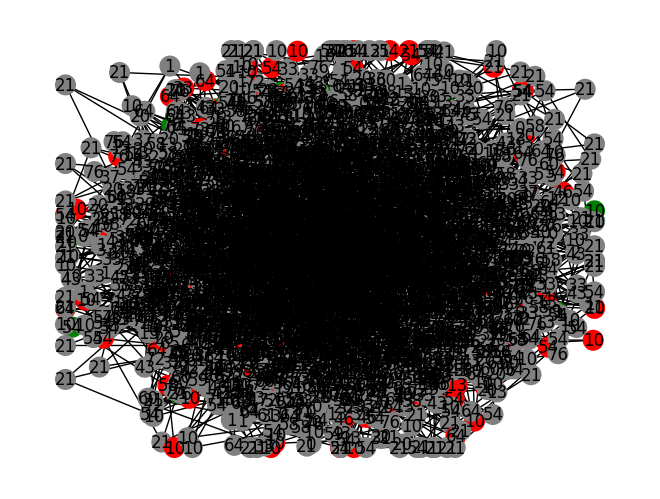

100%|██████████| 30/30 [00:02<00:00, 11.81it/s]


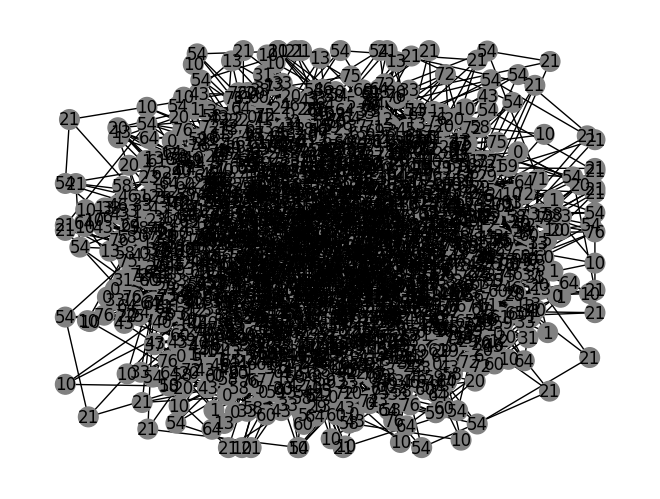

In [42]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm

# Set a fixed random seed for reproducibility
np.random.seed(1234)

# Generate a random graph with 80 nodes
G = nx.fast_gnp_random_graph(80, 0.1)

# Assign a label to each node indicating whether it is infected (1) or not (0)
labels = np.zeros(80)
labels[0] = 1  # patient 0 is initially infected

# Simulate the spread of the infection using the SIR model
beta = 0.2  # infection rate
gamma = 0.1  # recovery rate

# Define a function to update the plot at each time step
def update_plot(t):
    # Compute the probability of infection for each susceptible node
    infected_nodes = [i for i in range(80) if labels[i] == 1]
    susceptible_nodes = [i for i in range(80) if labels[i] == 0]
    for i in susceptible_nodes:
        neighbors = list(G.neighbors(i))
        num_infected_neighbors = sum([labels[j] for j in neighbors])
        p_infection = 1 - (1 - beta) ** num_infected_neighbors
        if np.random.rand() < p_infection:
            labels[i] = 1
    
    # Compute the probability of recovery for each infected node
    for i in infected_nodes:
        if np.random.rand() < gamma:
            labels[i] = 2
            
    # Draw the graph with node colors corresponding to the labels
    colors = ['green' if label == 0 else 'red' if label == 1 else 'gray' for label in labels]
    nx.draw(G, pos=nx.spring_layout(G), node_color=colors, with_labels=True, node_size=200)

# Create an animation of the infection spreading through the network
anim = FuncAnimation(plt.gcf(), update_plot, frames=30, interval=100, repeat=True)

# Display the animation inline in Google Colab
HTML(anim.to_jshtml())

# Save the animation as a gif
anim.save('infection.gif', writer='pillow')

# Show the final plot
plt.show()

# Add a progress bar to the simulation
for i in tqdm(range(30)):
    update_plot(i)

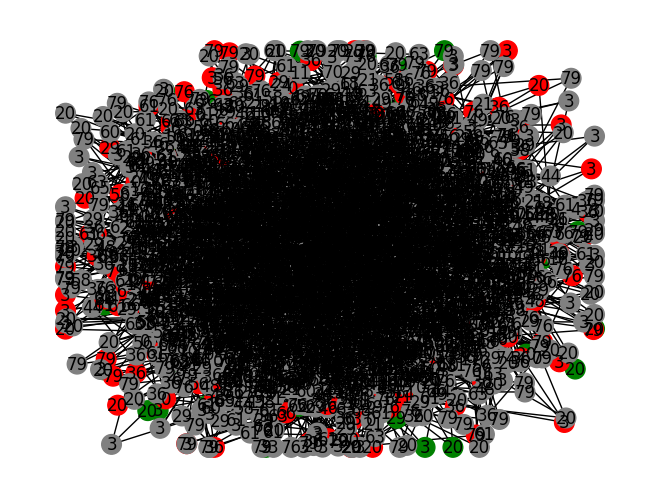

    node0  node1  node2  node3  node4  node5  node6  node7  node8  node9  \
0     2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
1     2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
2     2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
3     2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
4     2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
5     2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
6     2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
7     2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
8     2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
9     2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
10    2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
11    2.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
12    2.0   

In [43]:
import numpy as np
import networkx as nx
import pandas as pd
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

# Set a fixed random seed for reproducibility
np.random.seed(1234)

# Generate a random graph with 80 nodes
G = nx.fast_gnp_random_graph(80, 0.1)

# Assign a label to each node indicating whether it is infected (1) or not (0)
labels = np.zeros(80)
labels[0] = 1  # patient 0 is initially infected

# Simulate the spread of the infection using the SIR model
beta = 0.2  # infection rate
gamma = 0.1  # recovery rate

# Initialize an empty DataFrame to store the infection status of the nodes over time
df = pd.DataFrame(columns=[f"node{i}" for i in range(80)])

# Define a function to update the plot and append the infection status to the DataFrame
def update_plot(t):
    global df
    # Compute the probability of infection for each susceptible node
    infected_nodes = [i for i in range(80) if labels[i] == 1]
    susceptible_nodes = [i for i in range(80) if labels[i] == 0]
    for i in susceptible_nodes:
        neighbors = list(G.neighbors(i))
        num_infected_neighbors = sum([labels[j] for j in neighbors])
        p_infection = 1 - (1 - beta) ** num_infected_neighbors
        if np.random.rand() < p_infection:
            labels[i] = 1
    
    # Compute the probability of recovery for each infected node
    for i in infected_nodes:
        if np.random.rand() < gamma:
            labels[i] = 2
            
    # Append the infection status of the nodes to the DataFrame
    df.loc[t] = labels
    
    # Draw the graph with node colors corresponding to the labels
    colors = ['green' if label == 0 else 'red' if label == 1 else 'gray' for label in labels]
    nx.draw(G, pos=nx.spring_layout(G), node_color=colors, with_labels=True, node_size=200)

# Create an animation of the infection spreading through the network
anim = FuncAnimation(plt.gcf(), update_plot, frames=30, interval=100, repeat=True)

# Display the animation inline in Jupyter Notebook
HTML(anim.to_jshtml())

# Save the animation as a gif
anim.save('infection.gif', writer='pillow')

# Show the final plot
plt.show()

# Print the infection status DataFrame
df

In [ ]:
#s 0
#i 1
#r 2

In [49]:
df

,node0,node1,node2,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12,node13,node14,node15,node16,node17,node18,node19,node20,node21,node22,node23,node24,node25,node26,node27,node28,node29,node30,node31,node32,node33,node34,node35,node36,node37,node38,node39,node40,node41,node42,node43,node44,node45,node46,node47,node48,node49,node50,node51,node52,node53,node54,node55,node56,node57,node58,node59,node60,node61,node62,node63,node64,node65,node66,node67,node68,node69,node70,node71,node72,node73,node74,node75,node76,node77,node78,node79
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [53]:
df.shape

(30, 80)

In [65]:
import torch
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, TransformerConv
from torch_geometric.utils import degree
# Load your DataFrame here
df 

# Define node features and classes
num_nodes = len(df)
node_features = df.values
classes = np.argmax(node_features, axis=1)

# Define edge indices (assuming a fully connected graph)
edge_index = torch.tensor([(i, j) for i in range(num_nodes) for j in range(num_nodes) if i != j], dtype=torch.long).t().contiguous()

# Define PyTorch Geometric data object
data = Data(x=torch.tensor(node_features, dtype=torch.float), edge_index=edge_index)

# Define GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(node_features.shape[1], 16)
        self.conv2 = GCNConv(16, 3)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Define Graph Transformer model
class GraphTransformer(torch.nn.Module):
    def __init__(self):
        super(GraphTransformer, self).__init__()
        self.conv1 = TransformerConv(node_features.shape[1], 16, heads=4, dropout=0.5)
        self.conv2 = TransformerConv(16 * 4, 3, heads=4, dropout=0.5)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Initialize GNN and Graph Transformer models
gnn_model = GNN()
gt_model = GraphTransformer()

# Define optimizer and loss function
optimizer = torch.optim.Adam(list(gnn_model.parameters()) + list(gt_model.parameters()), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

# Train GNN model
for epoch in range(100):
    gnn_model.train()
    optimizer.zero_grad()
    gnn_output = gnn_model(data.x, data.edge_index)
    gnn_loss = loss_fn(gnn_output, torch.tensor(classes, dtype=torch.long))
    gnn_loss.backward()
    optimizer.step()
    
# Train Graph Transformer model
for epoch in range(100):
    gt_model.train()
    optimizer.zero_grad()
    gt_output = gt_model(data.x, data.edge_index)
    gt_loss = loss_fn(gt_output, torch.tensor(classes, dtype=torch.long))
    gt_loss.backward()
    optimizer.step()

# Evaluate GNN model
gnn_model.eval()
gnn_output = gnn_model(data.x, data.edge_index)
gnn_predicted_classes = np.argmax(gnn_output.detach().numpy(), axis=1)
gnn_accuracy = np.mean(gnn_predicted_classes == classes)

# Evaluate Graph Transformer model
gt_model.eval()
gt_output = gt_model(data.x, data.edge_index)
gt_predicted_classes = np.argmax(gt_output.detach().numpy(), axis=1)
gt_accuracy = np.mean(gt_predicted_classes == classes)

# Print accuracies
print("GNN accuracy:", gnn_accuracy)
print("Graph Transformer accuracy:", gt_accuracy)


GNN accuracy: 1.0
Graph Transformer accuracy: 1.0


In [67]:
data

Data(x=[30, 80], edge_index=[2, 870])

In [1]:
!pip install bitsandbytes
!pip install -q datasets loralib sentencepiece
!pip install -q git+https://github.com/zphang/transformers@c3dc391
!pip install -q git+https://github.com/huggingface/peft.git
from peft import PeftModel
from transformers import LLaMATokenizer, LLaMAForCausalLM, GenerationConfig

tokenizer = LLaMATokenizer.from_pretrained("decapoda-research/llama-7b-hf")
model = LLaMAForCausalLM.from_pretrained(
    "decapoda-research/llama-7b-hf",
    load_in_8bit=True,
    device_map="auto",
)
model = PeftModel.from_pretrained(model, "tloen/alpaca-lora-7b")

def generate_prompt(instruction, input=None):
    if input:
        return f"""Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Input:
{input}

### Response:"""
    else:
        return f"""Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Response:"""
generation_config = GenerationConfig(
    temperature=0.1,
    top_p=0.75,
    num_beams=4,
    device="cpu",
)

def evaluate(instruction, input=None, table=None):
    prompt = generate_prompt(instruction, input)
    inputs = tokenizer(prompt, return_tensors="pt")
    input_ids = inputs["input_ids"].cpu()
    generation_output = model.generate(
        input_ids=input_ids,
        generation_config=generation_config,
        return_dict_in_generate=True,
        output_scores=True,
        max_new_tokens=50
    )
    for s in generation_output.sequences:
        output = tokenizer.decode(s)
        response = output.split("### Response:")[1].strip()
        if table is not None:
            for i, row in table.iterrows():
                if row['scientific_name'] in prompt:
                    response = row['trade_name']
                    break
        print("Response:", response)
        return response

def main():
    df = pd.read_excel('/content/drugss.xlsx', sheet_name= 'Sheet2')

    scientific_names = df['scientific_name'].values.tolist() 
    trade_names = df['trade_name'].values.tolist()

    prompts = [f'create a treatment plan for the scientific name "{s}" to its trade name input:' for s in scientific_names]

    responses = []
    for prompt in prompts:
        response = evaluate(prompt) 
        responses.append(response)

    trade_names_mapped = []
    for r in responses:
        try:
            trade_name = r.split('Trade name: ')[1]
        except IndexError:
            trade_name = 'Not found'
        trade_names_mapped.append(trade_name)

    name_mapping = dict(zip(scientific_names, trade_names_mapped))  

    df['drug_name'] = df['scientific_name'].map(name_mapping)  

    df = df.drop(['scientific_name', 'trade_name'], axis=1)

    print(df.head())

if __name__ == "__main__":
    main()

ModuleNotFoundError: ignored